In [29]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5.0, 4.0) #设置图片大小
plt.rcParams['image.interpolation'] = 'nearest'  #插值方式
plt.rcParams['image.cmap'] = 'gray' #灰度空间

np.random.seed(1)  #设置随机数,指定随机数起始值





In [31]:
def zero_pad(X, pad):
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values = 0)#?
    return X_pad

x.shape =  (4, 3, 3, 2)
x_pad.shape =  (4, 7, 7, 2)
x[1, 1] =  [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


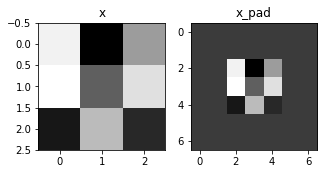

In [32]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)             #?
x_pad = zero_pad(x, 2)
print('x.shape = ', x.shape)
print('x_pad.shape = ', x_pad.shape)
print('x[1, 1] = ', x[1,1])                 #?
print('x_pad[1,1]', x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])                 #?
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [41]:
def conv_single_step(a_slice_prev, W, b):
    s = np.multiply(a_slice_prev, W) + b
    z = np.sum(s)
    return z

In [43]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

z = conv_single_step(a_slice_prev, W, b)
print('z = ',z)

z =  -23.16021220252078


In [47]:
def conv_forward(A_prev, W, b, hparameters):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape     #获得图片信息
    (f, f, n_C_prev, n_C) = W.shape                      #获得过滤器的信息
    stride = hparameters['stride']                        
    pad = hparameters['pad']
    n_H = int((n_H_prev + 2*pad - f)/stride) + 1
    n_W = int((n_W_prev + 2*pad - f)/stride) + 1
    
    Z = np.zeros((m, n_H, n_W, n_C))                    #初始化输出
    A_prev_pad = zero_pad(A_prev, pad)                  
    
    for i in range(m):                                  
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            for w in range(n_w):
                for c in range(n_C):
                    vert_start = h*stride
                    vert_end = vert_start + f
                    horiz_start = w*stride
                    horiz_end = horiz_start + f
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[..., c], b[..., c])
    assert(Z.shape == (m, n_H, n_w, n_C))
    
    cache = (A_prev, W, b, hparameters)  #反向传播使用
    return Z, cache
        
    